Step 4: Create Word2Vec model using Gensim 
The ML/DL algorithms cannot access text directly which is why we need some numerical representation so that these algorithms can process the data. In simple Machine Learning applications CountVectorizer and TFIDF are used which do not preserve the relationship between the words.
Word2Vec: Method to represent text to generate Word Embeddings which map all the words present in a language into a vector space of a given dimension. We can perform mathematical operations on these vectors which help preserve the relationship between the words. 
E
x
a
m
p
l
e
:
q
u
e
e
n
−
w
o
m
e
n
+
m
a
n
=
k
i
n
g
      
Example:queen−women+man=king      
Pre-built word embedding models like word2vec, GloVe, fasttext etc. can be downloaded using the Gensim downloader API. Sometimes you may not find word embeddings for certain words in your document. So you can train your model.

In [8]:
import gensim.downloader as api
from multiprocessing import cpu_count
from gensim.models.word2vec import Word2Vec

# load the text8 dataset
dataset = api.load("text8")

# extract a list of words from the dataset
data =[]
for word in dataset:
  data.append(word)

# We will split the data into two parts
data_1 = data[:1200]   # this is used to train the model
data_2 = data[1200:]   # this part will be used to update the model

# Training the Word2Vec model
w2v_model = Word2Vec(data_1, min_count = 0, workers = cpu_count())

# word vector for the word "time"
#print(w2v_model)
print(w2v_model.wv['time'])

[ 2.0178223  -0.30798694 -0.08009773 -1.6666574  -0.31435788 -1.5357647
 -0.69566965  0.9226764   0.63868964 -1.2095797   1.206306   -4.9565454
  0.7980568   2.6547868   0.2637344   2.3319585   0.15872322 -1.7220154
  0.63464576  0.610395   -1.3163569   1.0460933  -1.5075914   0.25725156
  0.647806   -0.75024253  0.86984044 -2.1239932   1.6541482   2.3241482
 -2.8943884   1.5359788   1.0782799   2.7786462   1.1045123  -3.4877872
  3.333814    2.7388961   2.2682374   1.4946712  -3.1747024   1.4775999
 -0.6735439   0.479435   -0.7988759  -1.4074901  -3.2994666   1.58941
 -0.75545365 -1.5177501  -0.2378995   5.822143    1.8364199  -1.0748363
 -2.0835435  -0.867459    0.24820477 -2.875718    1.2059336  -0.28241858
 -0.7266234   1.3115691  -1.6721009  -1.0330073   1.9666977  -2.3565152
 -0.9268598   2.403337   -1.8521688  -1.0609353   2.431718    0.6938274
  0.22704187  2.0040615  -0.94141924 -1.9747709   0.96367675 -1.4762486
 -3.2170975  -1.0894002   0.9809645  -1.5051074  -0.33436564  2.

In [9]:
vector = w2v_model.wv['time']
print(vector)
print(vector.shape)
print(vector[:10])  # First 10 values

[ 2.0178223  -0.30798694 -0.08009773 -1.6666574  -0.31435788 -1.5357647
 -0.69566965  0.9226764   0.63868964 -1.2095797   1.206306   -4.9565454
  0.7980568   2.6547868   0.2637344   2.3319585   0.15872322 -1.7220154
  0.63464576  0.610395   -1.3163569   1.0460933  -1.5075914   0.25725156
  0.647806   -0.75024253  0.86984044 -2.1239932   1.6541482   2.3241482
 -2.8943884   1.5359788   1.0782799   2.7786462   1.1045123  -3.4877872
  3.333814    2.7388961   2.2682374   1.4946712  -3.1747024   1.4775999
 -0.6735439   0.479435   -0.7988759  -1.4074901  -3.2994666   1.58941
 -0.75545365 -1.5177501  -0.2378995   5.822143    1.8364199  -1.0748363
 -2.0835435  -0.867459    0.24820477 -2.875718    1.2059336  -0.28241858
 -0.7266234   1.3115691  -1.6721009  -1.0330073   1.9666977  -2.3565152
 -0.9268598   2.403337   -1.8521688  -1.0609353   2.431718    0.6938274
  0.22704187  2.0040615  -0.94141924 -1.9747709   0.96367675 -1.4762486
 -3.2170975  -1.0894002   0.9809645  -1.5051074  -0.33436564  2.

You can also use the most_similar( ) function to find similar words to a given word.

In [11]:
# similar words to the word "time"
print(w2v_model.wv.most_similar('time'))

# save your model
w2v_model.save('Word2VecModel')

# load your model
model = Word2Vec.load('Word2VecModel')

[('moment', 0.6439275741577148), ('period', 0.5806167721748352), ('stage', 0.5388388633728027), ('khabushan', 0.5185801982879639), ('kunna', 0.5171431303024292), ('sinnamary', 0.5027573108673096), ('course', 0.5022173523902893), ('expense', 0.5020482540130615), ('lemhi', 0.5017063021659851), ('decade', 0.4954330325126648)]


In [15]:
# build model vocabulary from a sequence of sentences
w2v_model.build_vocab(data_2, update = True)

# train word vectors
w2v_model.train(data_2, total_examples = w2v_model.corpus_count, epochs = w2v_model.epochs)

print(w2v_model.wv['time'])

[ 1.0992136e+00  6.5642637e-01 -8.3542246e-01 -1.4824758e+00
 -6.0208923e-01  8.5391708e-02 -1.3525259e+00 -7.3458034e-01
  8.6294204e-01 -1.2882493e+00  1.5947643e-01 -4.2791409e+00
 -2.4720517e-01  3.6197355e+00  8.0823553e-01  1.8327527e+00
  3.0510792e-01 -3.9928821e-01 -5.8617228e-01  5.9851074e-01
 -1.1988676e+00  1.4183110e-01 -1.4400994e+00  3.1563726e-01
  2.7448037e-01 -7.7575636e-01 -4.0136552e-01 -9.0039569e-01
  2.5414605e+00  4.7356769e-01 -3.1466637e+00  2.1617751e+00
  1.6013992e-01  2.9515147e+00  1.4909891e+00 -2.1107972e+00
  3.2904105e+00  4.7296486e+00  9.3286854e-01  2.8998697e-01
 -2.7146752e+00  2.2864943e+00 -1.6226377e+00  1.4594469e+00
 -1.8934764e+00 -6.3391709e-01 -3.9312172e+00  8.3217603e-01
 -9.0521854e-01 -2.5469491e+00  1.8623331e+00  4.7448325e+00
  2.4441993e+00 -8.2669067e-01 -7.6411414e-01 -7.8946185e-01
 -1.0077338e+00 -2.2063839e+00  8.7542737e-01  3.8973713e-01
 -1.6145744e+00  1.5941643e+00 -9.5307253e-02  6.9345462e-01
  2.4174657e+00 -1.29825

Step 5: Create Doc2Vec model using Gensim 
In contrast to the Word2Vec model, the Doc2Vec model gives the vector representation for an entire document or group of words. With the help of this model, we can find the relationship among different documents such as- 
 

If we train the model for literature such as "Through the Looking Glass".We can say that-  

T
h
r
o
u
g
h
T
h
e
L
o
o
k
i
n
g
G
l
a
s
s
=
A
l
i
c
e
I
n
W
o
n
d
e
r
L
a
n
d
      
ThroughTheLookingGlass=AliceInWonderLand      
5.1) Train the model

In [16]:
import gensim
import gensim.downloader as api
from gensim.models import doc2vec

# get dataset
dataset = api.load("text8")
data =[]
for w in dataset:
  data.append(w)

# To train the model we need a list of tagged documents
def tagged_document(list_of_ListOfWords):
  for x, ListOfWords in enumerate(list_of_ListOfWords):
    yield doc2vec.TaggedDocument(ListOfWords, [x])
  
# training data
data_train = list(tagged_document(data))
  
# print trained dataset
print(data_train[:1])

[TaggedDocument(words=['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers'

You're preparing text data from the text8 dataset to train a Doc2Vec model using Gensim.
Doc2Vec is used to learn vector representations of entire documents, not just words (like Word2Vec).

✅ Step-by-Step Explanation
🔹 Step 1: Import libraries

In [17]:
import gensim
import gensim.downloader as api
from gensim.models import doc2vec
#You import:

#gensim: NLP modeling library.

#api: for downloading datasets like text8.

#doc2vec: Gensim's module for training document embeddings.

#🔹 Step 2: Load the text8 dataset

dataset = api.load("text8")
##text8 is a cleaned dataset extracted from Wikipedia.

#It consists of pre-tokenized sentences (lists of words).

#It returns a generator, so you convert it to a list next.

#🔹 Step 3: Flatten into a list

data =[]
for w in dataset:
  data.append(w)
#🚫 ⚠️ Issue Here: This code doesn't flatten the dataset properly. It creates a list of sentences, which is correct, but the variable name w is misleading.


data = list(dataset)  # each item is a list of words (sentence)
#🔹 Step 4: Create Tagged Documents

def tagged_document(list_of_ListOfWords):
  for x, ListOfWords in enumerate(list_of_ListOfWords):
    yield doc2vec.TaggedDocument(ListOfWords, [x])
#This function prepares the data for Doc2Vec:

#ListOfWords: a sentence (i.e., list of words)

#x: index of the sentence

#TaggedDocument: a special structure required for Doc2Vec that pairs:

#the list of words

#a tag (e.g., document ID or label)

In [18]:
#TaggedDocument(words=['anarchism', 'originated', 'as', ...], tags=[0])
#🔹 Step 5: Generate the training data

data_train = list(tagged_document(data))
#This will convert all your sentences into tagged documents that #Doc2Vec can train on.

#🔹 Step 6: Print a sample

print(data_train[:1])
#You print the first tagged document to check the structure.
#It will look like:


#[TaggedDocument(words=['anarchism', 'originated', 'as', 'a', ...], #tags=[0])]

#hence Load text8	Get a large tokenized Wikipedia corpus
#Prepare data	Convert each sentence into a TaggedDocument
#Output	Data is now ready for training a Doc2Vec model

#🚀 Next Step: Train a Doc2Vec Model
#Once you've prepared data_train, you can train a model like this:


from gensim.models import Doc2Vec

# Train Doc2Vec model
model = Doc2Vec(vector_size=50, min_count=2, epochs=20)
model.build_vocab(data_train)
model.train(data_train, total_examples=model.corpus_count, epochs=model.epochs)

# Get vector for document 0
print(model.dv[0])
#Would you like to continue with training, evaluating, or visualizing #the document vectors next?

[TaggedDocument(words=['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers'

Update the modelCode: 

In [19]:
# Initialize the model
d2v_model = doc2vec.Doc2Vec(vector_size = 40, min_count = 2, epochs = 30)

# build the vocabulary
d2v_model.build_vocab(data_train)

# Train Doc2Vec model
d2v_model.train(data_train, total_examples = d2v_model.corpus_count, epochs = d2v_model.epochs)

# Analyzing the output
Analyze = d2v_model.infer_vector(['violent', 'means', 'to', 'destroy'])
print(Analyze)

[ 0.09896787 -0.1145265  -0.34492907  0.1584209   0.1254772  -0.1402656
 -0.03671961 -0.0524611  -0.48802334  0.02231668  0.2627496  -0.06658946
 -0.13482374 -0.17500338 -0.1777894   0.07276564  0.09054905  0.27039713
 -0.20581467 -0.1881783  -0.03886623  0.074224   -0.0055709   0.26908252
 -0.04046751 -0.20560387 -0.16355851 -0.2036902   0.1131578  -0.3162617
  0.01410127  0.11967876 -0.3154527  -0.31975752 -0.13854374  0.08850063
  0.13767463 -0.33374092 -0.10037909 -0.13068639]


You're training a Doc2Vec model using Gensim, and then you're inferring a document vector for a new list of words. Let's walk through your code line by line and explain everything clearly:

🔧 Code Breakdown and Explanation
1️⃣ Initialize the Doc2Vec model

d2v_model = doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
This line sets up a new Doc2Vec model with the following parameters:

Parameter	Meaning
vector_size=40	Each document will be represented by a 40-dimensional vector
min_count=2	Ignores words that appear in fewer than 2 documents
epochs=30	The model will go through the data 30 times during training

2️⃣ Build vocabulary from tagged documents

d2v_model.build_vocab(data_train)
This scans through data_train (your tagged documents) and builds a vocabulary, which is a map of:

All the unique words it has seen

Their frequencies

Associated tags

This is required before training the model.

3️⃣ Train the model on the corpus

d2v_model.train(data_train, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)
This trains the model using your tagged document data:

Argument	Explanation
total_examples	Total number of documents (sentences) in the data
epochs	How many full passes over the data to run

After this, your model will have learned vector representations of all the documents and words.

4️⃣ Infer vector for a new list of words

Analyze = d2v_model.infer_vector(['violent', 'means', 'to', 'destroy'])
This is inference: generating a vector for a new, unseen "document" (in this case, a short phrase).

It does not change the model — it just tries to find the closest document vector for the given words.

Useful for: classification, clustering, similarity comparison, etc.

➡️ Analyze now holds a 40-dimensional vector (because vector_size=40).

5️⃣ Print the result

print(Analyze)
This will print a list like:


[ 0.031, -0.048, 0.110, ..., -0.022 ]
Each number represents a feature or semantic dimension of the input phrase ['violent', 'means', 'to', 'destroy'].

✅ Summary
Action	Purpose
Initialize model	Set up the Doc2Vec architecture
Build vocab	Prepare model with known words and tags
Train model	Learn document and word vectors
Infer vector	Generate a vector for unseen text
Print vector	See how your model represents new content numerically

🧠 What's Next?
You can now:

Compare the inferred vector with other document vectors using .similar_by_vector()

Use .dv.most_similar(positive=[Analyze]) to find documents similar to the phrase

Would you like an example that shows semantic similarity using this inferred vector?








You said:
why vector_size=40 parameter is used in above


ChatGPT said:
Great question!

🎯 vector_size=40 in Doc2Vec
The vector_size parameter (formerly called size in older versions of Gensim) controls the dimensionality of the document vectors that the model learns.

✅ What It Means:

vector_size=40
This tells the model to represent each document (or sentence) as a vector with 40 floating-point numbers.

So when you run:


Analyze = d2v_model.infer_vector(['violent', 'means', 'to', 'destroy'])
print(Analyze)
You’ll get output like:


[ 0.031, -0.048, 0.110, ..., -0.022 ]  # length = 40
Each value in that vector represents a semantic dimension of the input text — capturing things like tone, topic, or word relationships.

🔍 Why 40? Is it optimal?
Not necessarily — you can tune this parameter based on your needs.

vector_size	Description
20–50	Fast, less memory, may miss nuance
100–300	Standard for high-quality semantic vectors
300+	Slower, better semantic precision (but needs more data and compute)

🧪 Example Impact:
Smaller vector size (e.g., 20): model trains faster, but captures less nuance.

Larger vector size (e.g., 200): model captures richer meaning but takes more time and data to train well.

✅ Summary
Parameter	What it Does
vector_size	Sets the number of dimensions in your document vector
Value = 40	Creates 40-dimensional representations of each document
Trade-off	More dimensions → richer vectors but more compute

Step 6: Create Topic model with LDA 
LDA is a popular method for topic modelling which considers each document as a collection of topics in a certain proportion. We need to take out the good quality of topics such as how segregated and meaningful they are. The good quality topics depend on- 
 

the quality of text processing
finding the optimal number of topics
Tuning parameters of the algorithm
NOTE: If you run this code on python3.7 version you might get a StopIteration Error.
      It is advisable to use python3.6 version for this.

Follow the below steps to create the model: 
6.1 Prepare the Data 
This is done by removing the stopwords and then lemmatizing it. In order to lemmatize using Gensim, we need to first download the pattern package and the stopwords. 
 

In [21]:
#download pattern package
!pip install pattern

#run in python console
import nltk
nltk.download('stopwords')

  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.24.4

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-1.24.4:
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-1.24.4
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ------------------------

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize
# from pattern.en import lemma
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import logging

logging.basicConfig(format ='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level = logging.INFO)

# import stopwords
stop_words = stopwords.words('english')
# add stopwords
stop_words = stop_words + ['subject', 'com', 'are', 'edu', 'would', 'could']

# import the dataset
dataset = api.load("text8")
data = [w for w in dataset]

# Preparing the data
processed_data = []

for x, doc in enumerate(data[:100]):
    doc_out = []
    for word in doc:
        if word not in stop_words:  # to remove stopwords
            Lemmatized_Word = lemmatize(word, allowed_tags = re.compile('(NN|JJ|RB)'))  # lemmatize
            if Lemmatized_Word:
                doc_out.append(Lemmatized_Word[0].split(b'/')[0].decode('utf-8'))
        else:
            continue
    processed_data.append(doc_out) # processed_data is a list of list of words

# Print sample    
print(processed_data[0][:10])

ImportError: cannot import name 'lemmatize' from 'gensim.utils' (C:\Users\Welcome\anaconda3\envs\myenv\lib\site-packages\gensim\utils.py)

text8 is a tokenized corpus: a generator of lists of words (sentences).

You convert it into a list of documents (data) — each doc is a list of words.

What’s happening inside:
Step	Explanation
data[:100]	Limit to first 100 documents for speed/testing
if word not in stop_words:	Skip common words
`lemmatize(word, allowed_tags=re.compile('(NN	JJ
Lemmatized_Word[0].split(b'/')[0].decode('utf-8')	Extract only the word part from the lemmatizer's output (which includes POS tag)
processed_data.append(doc_out)	Store the cleaned, lemmatized list of words for each document

Logging is set up for Gensim’s internal processes.

 Important Notes
lemmatize in Gensim uses the pattern library internally. If pattern is not installed, this may not work. (It's optional and not always available on Windows.)

split(b'/')[0] is necessary because lemmatize() returns a byte string like:
b'anarchism/NN', so you're extracting just the word (anarchism).

The use of allowed_tags=re.compile('(NN|JJ|RB)') limits lemmatization to meaningful parts of speech.

| Component          | Purpose                                             |
| ------------------ | --------------------------------------------------- |
| `text8` dataset    | Tokenized, clean Wikipedia text                     |
| Stopword filtering | Remove common/irrelevant words                      |
| Lemmatization      | Reduce words to base form (e.g., "running" → "run") |
| Processed output   | Clean list of tokens for modeling                   |


 What is lemmatize() doing?
Gensim's lemmatize() internally tags each word with its POS (part-of-speech) — like noun, adjective, verb, etc.

Then it returns a byte string like:

b'government/NN'  # NN = noun
If you want to keep only certain kinds of words (say, nouns and adjectives), you filter using allowed_tags.

🔤 The Regular Expression
allowed_tags = re.compile('(NN|JJ|RB)')
| Tag  | Meaning   | Example       |
| ---- | --------- | ------------- |
| `NN` | Noun      | cat, freedom  |
| `JJ` | Adjective | blue, modern  |
| `RB` | Adverb    | quickly, very |
This excludes:

Verbs (VB)

Prepositions (IN)

Determiners (DT)

Pronouns (PRP), etc.

✅ Why Filter POS?
To improve quality of features for topic modeling or embedding tasks by:

Focusing on content words (nouns, adjectives, adverbs)

Ignoring function words (like "is", "have", "he", "was"
from gensim.utils import lemmatize
lemmatize("running", allowed_tags=re.compile('(VB|NN)'))
# Output: [b'run/VB'] ← allowed because VB matches
| Part                           | Meaning                                          |       |                                                    |
| ------------------------------ | ------------------------------------------------ | ----- | -------------------------------------------------- |
| `allowed_tags=re.compile(...)` | Filters word-POS pairs returned by `lemmatize()` |       |                                                    |
| \`(NN                          | JJ                                               | RB)\` | Only allows **Nouns**, **Adjectives**, **Adverbs** |
| Why?                           | Focus on semantically rich, meaningful words     |       |                                                    |
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)
logging.basicConfig(...)
This configures how logging messages appear.

format='%(asctime)s : %(levelname)s : %(message)s'
Defines the format of log messages.
| Code            | Meaning                                 |
| --------------- | --------------------------------------- |
| `%(asctime)s`   | Timestamp (e.g., `2025-07-07 10:15:00`) |
| `%(levelname)s` | Logging level (e.g., `INFO`, `WARNING`) |
| `%(message)s`   | The actual message                      |
2025-07-07 10:15:00,789 : INFO : finished training model
logging.root.setLevel(level=logging.INFO)
This sets the logging level — i.e., what kind of messages you want to see.
| Level     | Purpose                         |
| --------- | ------------------------------- |
| `DEBUG`   | Show everything (very detailed) |
| ✅ `INFO`  | Show general useful updates     |
| `WARNING` | Show potential problems         |
| `ERROR`   | Show serious issues             |
So here you're saying:

"I want to see INFO, WARNING, ERROR, etc., but skip DEBUG logs."

✅ Why It’s Useful in Gensim
Gensim models (like LdaModel, Word2Vec, etc.) log important messages like:

When training starts/ends

Number of topics

Progress info

Vocabulary size

Any issues (e.g., skipped documents)

This helps track training status without printing manually.

| Line               | Does What                                      |
| ------------------ | ---------------------------------------------- |
| `basicConfig(...)` | Sets how logs are displayed                    |
| `setLevel(INFO)`   | Controls the minimum severity of logs shown    |
| Benefit            | Helps you monitor and debug training pipelines |


doc_out.append(Lemmatized_Word[0].split(b'/')[0].decode('utf-8'))
🧠 What lemmatize() Returns
Gensim's lemmatize(word) returns a list of byte strings in this format:
[b'government/NN', b'biggest/JJ', b'slowly/RB']
Each item contains:

The lemmatized word

A /

Its POS tag (e.g., NN = noun)


Lemmatized_Word[0] = b'government/NN'
 Lemmatized_Word[0]
Gets the first (and usually only) lemmatized word in the list
b'government/NN'

 Lemmatized_Word[0]
Gets the first (and usually only) lemmatized word in the list

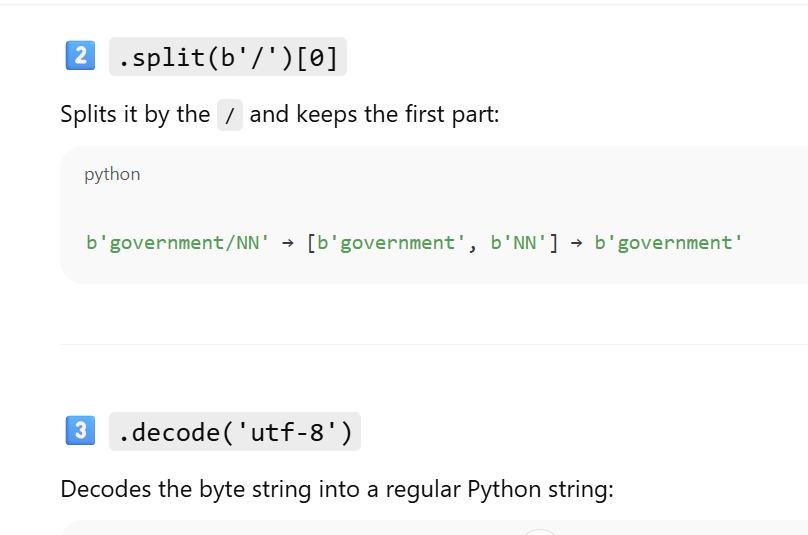

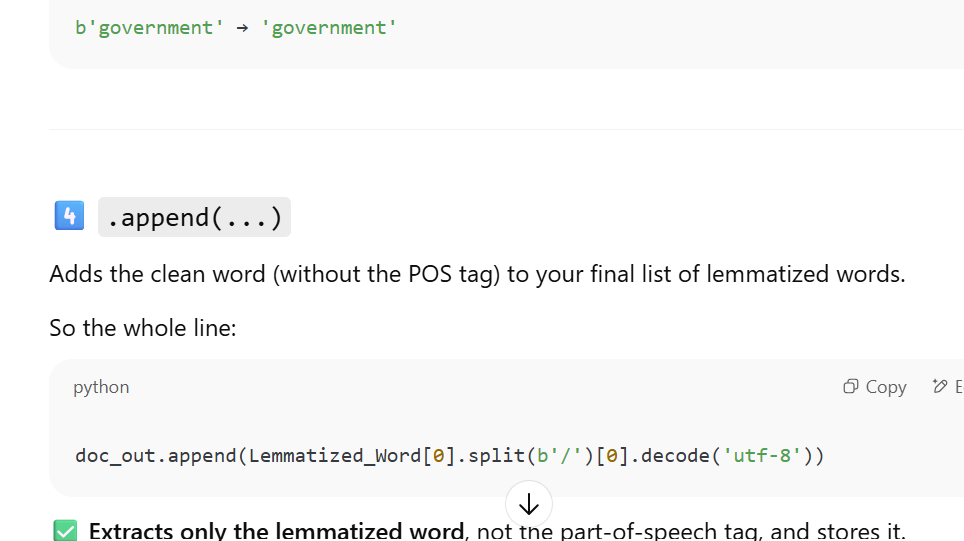

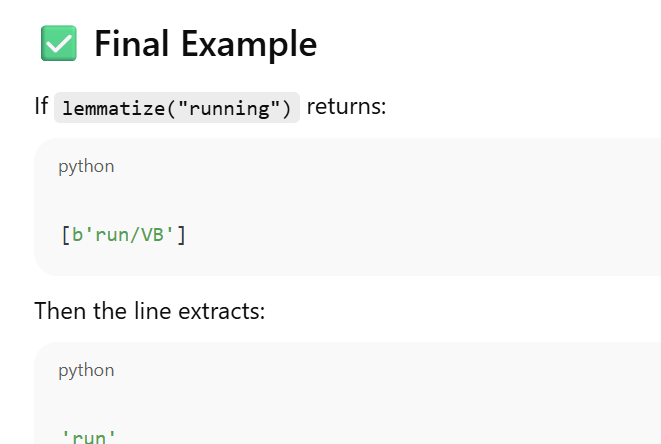

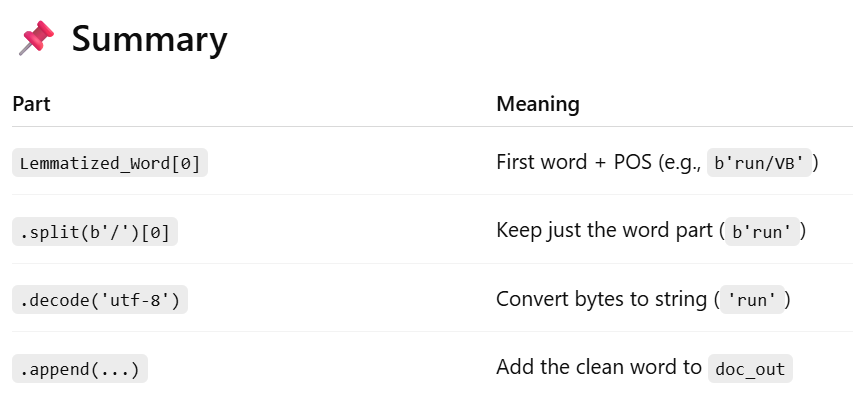